## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Collection and Preprocessing

In [2]:
# Loadig dataset
df=pd.read_csv('train_loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Size of dataset
df.shape

(614, 13)

#### There are 614 rows and 13 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Statistical Measure

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
## Missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
pd.crosstab(df['Credit_History'], df['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

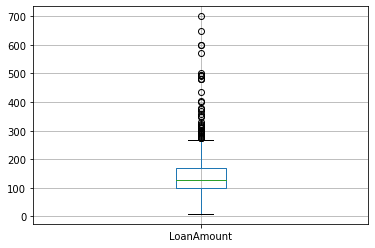

In [9]:
df.boxplot(column='LoanAmount')

<AxesSubplot:>

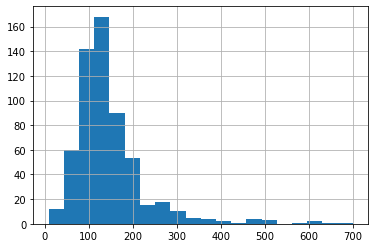

In [10]:
df['LoanAmount'].hist(bins=20)

<AxesSubplot:xlabel='Education', ylabel='count'>

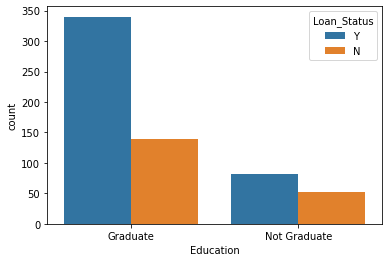

In [11]:
# Education and loan_status
sns.countplot(x='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

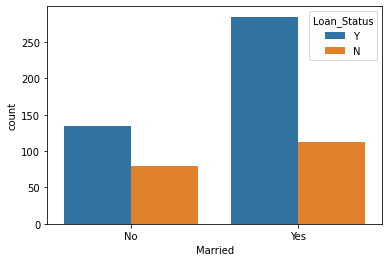

In [12]:
# Marital status and Loan Status
sns.countplot(x='Married', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

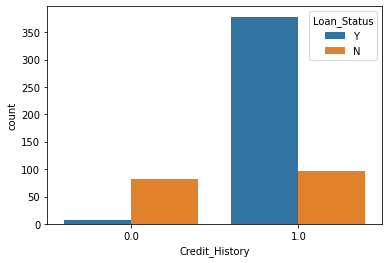

In [13]:
# Credit History and loan Status
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)

## Handling Missing Values
#### Imputation of categorical values will be performed by mode

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

#### Imputation of numerical values will be performed by mean

In [15]:
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Drop Unnecessary variable

In [17]:
df=df.drop(['Loan_ID'], axis=1)

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
# Convert categorical columns into numerical values
df.replace({'Gender':{'Male':1, 'Female':0}, 'Married':{'No':0, 'Yes':1}, 'Education':{'Not Graduate':0, 'Graduate':1}, 'Self_Employed':{'Yes':1, 'No':0}, 'Loan_Status':{'Y':1, 'N':0}}, inplace=True)

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [21]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [22]:
df=df.replace({'Dependents':{'3+':4}})

In [23]:
df['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [24]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
Property=pd.get_dummies(df['Property_Area'],drop_first=True)

In [26]:
df=pd.concat([df, Property], axis=1)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,Urban,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1


In [28]:
df.drop(['Property_Area'], axis=1, inplace=True)

In [52]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [54]:
df.to_csv('file1.csv')

In [30]:
# Seperate dependent and independent variables
X=df.drop('Loan_Status', axis=1)
y=df['Loan_Status']

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1


In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing th

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
X_train.shape

(491, 12)

In [37]:
X_test.shape

(123, 12)

## Training the model SVM


In [38]:
model=svm.SVC(kernel='linear')

In [40]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [44]:
# Training data accuracy
X_training_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_training_prediction, y_train)
print(training_data_accuracy)

0.790224032586558


In [47]:
# Test data accauracy
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, y_test)
print(test_data_accuracy)

0.8211382113821138


## Making predictive system

In [60]:
input_data=(1,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1)

In [61]:
input_data_as_nparray=np.asarray(input_data)

In [62]:
input_data_reshaped=input_data_as_nparray.reshape(1, -1)

In [63]:
prediction=model.predict(input_data_reshaped)
print(prediction)

[1]


In [69]:
if (prediction[0]==1):
    print('Yes')
else:
    print('No')

Yes
